<a href="https://colab.research.google.com/github/naralakamsani/supervised_learning/blob/main/reservation_retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [91]:
from google.colab import drive

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#Data

[Hotel Reservation](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset?select=Hotel+Reservations.csv)


**Load Data**

In [92]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
df = pd.read_csv("/content/drive/MyDrive/CS7641/Data/Hotel_Reservations/Hotel Reservations.csv")

In [94]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


**Encode Labeled Data**

In [95]:
df = df.drop(columns=["Booking_ID"])

df['booking_status'].replace('Not_Canceled', 0, inplace=True)
df['booking_status'].replace('Canceled', 1, inplace=True)

df['type_of_meal_plan'].replace('Not Selected', 0, inplace=True)
df['type_of_meal_plan'].replace('Meal Plan 1', 1, inplace=True)
df['type_of_meal_plan'].replace('Meal Plan 2', 2, inplace=True)
df['type_of_meal_plan'].replace('Meal Plan 3', 3, inplace=True)

df['room_type_reserved'].replace('Room_Type 1', 1, inplace=True)
df['room_type_reserved'].replace('Room_Type 2', 2, inplace=True)
df['room_type_reserved'].replace('Room_Type 3', 3, inplace=True)
df['room_type_reserved'].replace('Room_Type 4', 4, inplace=True)
df['room_type_reserved'].replace('Room_Type 5', 5, inplace=True)
df['room_type_reserved'].replace('Room_Type 6', 6, inplace=True)
df['room_type_reserved'].replace('Room_Type 7', 7, inplace=True)

df['market_segment_type'].replace('Offline', 0, inplace=True)
df['market_segment_type'].replace('Online', 1, inplace=True)
df['market_segment_type'].replace('Corporate', 2, inplace=True)
df['market_segment_type'].replace('Aviation', 3, inplace=True)
df['market_segment_type'].replace('Complementary', 4, inplace=True)

In [96]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1


**Split Data**

In [97]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['booking_status'],axis=1), df['booking_status'], test_size=0.2, random_state=1)

In [98]:
print("Train data size:", len(x_train))
print("Test data size:", len(x_test))

Train data size: 29020
Test data size: 7255


**Balance Dataset**

In [99]:
print('Training Set Class Balance:')
print(y_train.value_counts())

Training Set Class Balance:
0    19483
1     9537
Name: booking_status, dtype: int64


In [100]:
rus = RandomUnderSampler(random_state=0)
x_train, y_train = rus.fit_resample(x_train, y_train)

In [101]:
print('Training Set Class Balance:')
print(y_train.value_counts())

Training Set Class Balance:
0    9537
1    9537
Name: booking_status, dtype: int64


**Scale Data**

In [102]:
# scaler =  MinMaxScaler()
# x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
# x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [103]:
x_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,2,1,0,0,1,32,2018,12,10,1,0,0,0,88.00,1
1,2,0,1,2,1,0,1,15,2018,2,12,0,0,0,0,40.67,0
2,2,0,1,1,0,0,1,2,2018,4,11,1,0,0,0,104.00,1
3,2,0,0,3,0,0,1,161,2018,3,15,1,0,0,0,60.98,1
4,2,0,1,3,2,0,1,46,2018,12,5,0,0,0,0,98.00,0


# Plots

**Learning Curve**

In [104]:
def plot_learning_curve(estimator, title, x, y, cv=10, n_jobs=-1, train_sizes=[0.1,0.25,0.4,0.65,0.8,1], scoring='accuracy'):
    plt.figure()
    plt.title(title)

    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross validfation Accuracy")

    plt.legend(loc="best")
    return plt

In [105]:
def plot_validation_curve(estimator, title, x, y, param_name, param_range, cv=10, n_jobs=-1, scoring="accuracy"):
    plt.figure()
    plt.title(title)

    plt.xlabel(param_name)
    plt.ylabel("accuracy")
    train_scores, test_scores = validation_curve(estimator, x, y, scoring=scoring, cv=cv, n_jobs=n_jobs,param_name=param_name, param_range=param_range)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross validfation Accuracy")

    plt.legend(loc="best")
    return plt

In [106]:
def plot_loss_curve(estimator, title, x, y, cv=10, n_jobs=-1, train_sizes=[0.1,0.25,0.4,0.65,0.8,1], scoring="accuracy"):
    plt.figure()
    plt.title(title)

    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross validfation Accuracy")

    plt.legend(loc="best")
    return plt

In [107]:
def plot_model_times_and_performance(estimator, title, x, y, cv=10, n_jobs=-1, train_sizes=[0.1,0.25,0.4,0.65,0.8,1], scoring="accuracy"):
    plt.figure()
    plt.title(title)

    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross validfation Accuracy")

    plt.legend(loc="best")
    return plt

In [108]:
def get_model_performance_info(estimator, title, x, y, cv=10, n_jobs=-1, train_sizes=[0.1,0.25,0.4,0.65,0.8,1], scoring="accuracy"):
    plt.figure()
    plt.title(title)

    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross validfation Accuracy")

    plt.legend(loc="best")
    return plt

DT: Pruning

Boosting: # of Weak Learners

NN: Hidden Layer Size (Width, Depth)

SVM: Kernel Type

KNN: K

# Decision Tree

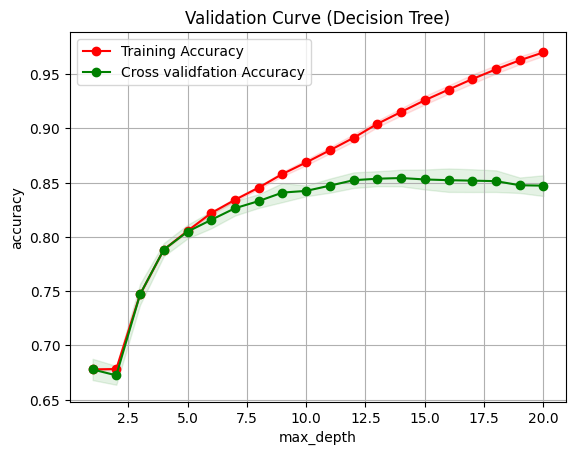

In [109]:
plot_validation_curve(DecisionTreeClassifier(random_state=1), "Validation Curve (Decision Tree)", x_train, y_train, param_range=np.arange(1, 21), param_name="max_depth")
plt.show()

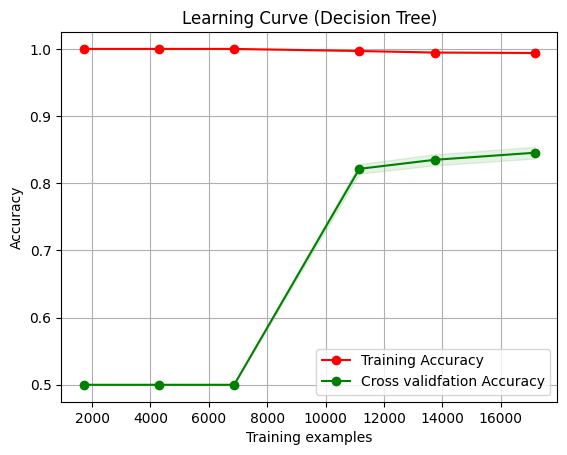

In [110]:
plot_learning_curve(DecisionTreeClassifier(random_state=1), "Learning Curve (Decision Tree)", x_train, y_train)
plt.show()

In [111]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [112]:
y_pred = dt_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88      4907
           1       0.72      0.84      0.78      2348

    accuracy                           0.84      7255
   macro avg       0.82      0.84      0.83      7255
weighted avg       0.85      0.84      0.84      7255



#Neural Network


In [113]:
nn_model = MLPClassifier(random_state=1, hidden_layer_sizes=(100,100), validation_fraction=0.2, early_stopping=True)
nn_model.fit(x_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 100),
              random_state=1, validation_fraction=0.2)

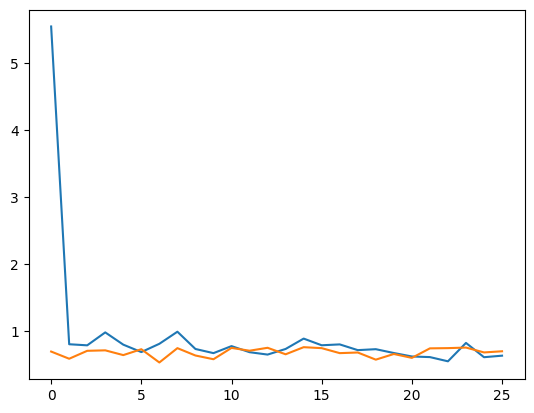

In [114]:
plt.plot(nn_model.loss_curve_)
plt.plot(nn_model.validation_scores_)
plt.show()

In [115]:
y_pred = nn_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79      4907
           1       0.57      0.80      0.67      2348

    accuracy                           0.74      7255
   macro avg       0.73      0.76      0.73      7255
weighted avg       0.78      0.74      0.75      7255



#Boosting


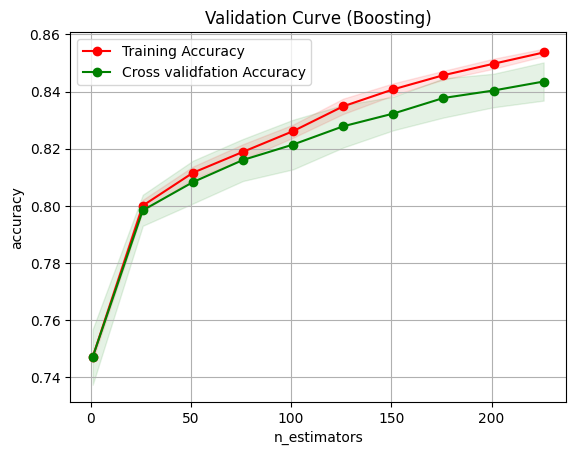

In [116]:
plot_validation_curve(GradientBoostingClassifier(random_state=1), "Validation Curve (Boosting)", x_train, y_train, param_name="n_estimators", param_range=np.arange(1, 250, 25))
plt.show()

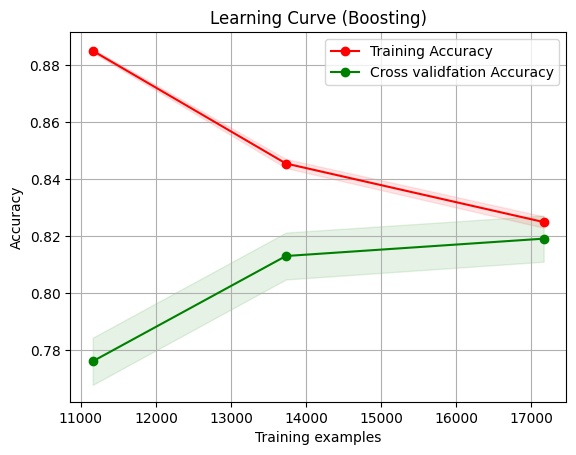

In [117]:
plot_learning_curve(GradientBoostingClassifier(random_state=1), "Learning Curve (Boosting)", x_train, y_train)
plt.show()

In [118]:
boosting_model = GradientBoostingClassifier(random_state=1)
boosting_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

In [119]:
y_pred = boosting_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      4907
           1       0.71      0.81      0.76      2348

    accuracy                           0.83      7255
   macro avg       0.81      0.83      0.81      7255
weighted avg       0.84      0.83      0.83      7255



#Support Vector Machine

In [ ]:
plot_learning_curve(SVC(), "Learning Curve (Support Vector Machine)", x_train, y_train)
plt.show()

In [ ]:
sv_model = SVC()
sv_model.fit(x_train, y_train)

In [ ]:
y_pred = sv_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

#k-Nearest Neighbor

In [ ]:
plot_validation_curve(KNeighborsClassifier(), "Validation Curve (k-Nearest Neighbor)", x_train, y_train, param_range=np.arange(1, 10), param_name="n_neighbors")
plt.show()

In [ ]:
plot_learning_curve(KNeighborsClassifier(), "Learning Curve (k-Nearest Neighbor)", x_train, y_train)
plt.show()

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

In [ ]:
y_pred = knn_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))